<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание Ultra pro**
модель для восстановления фотографии.

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
from random import randint
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


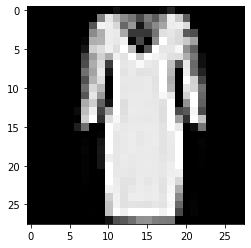

In [ ]:
x_train = x_train.astype('float32') / 255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1)

plt.imshow(x_train[190].reshape(28, 28), cmap='gray')
print(x_train.shape)
print(x_test.shape)
print(x_train[0].shape)

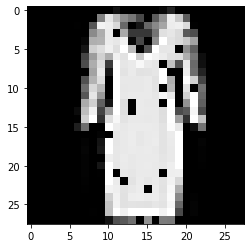

In [ ]:
def add_noise(giving_img):
    img = np.copy(giving_img)
    pix = img.shape[0]     
    number_of_pixels = randint(0 , 1000)
    x = randint(0, 5)
    noise = np.zeros([x, x, 3], dtype=np.uint8)
    for i in range(int(number_of_pixels / randint(1, 4))):
        y_coord= randint(0, pix - 1)
        x_coord= randint(0, pix - 1)
        img[y_coord][x_coord] = 0
          
    return img

noisy = add_noise(x_train[190])
plt.imshow(noisy.reshape((28, 28)), cmap='gray')

In [ ]:
def plotImages(noisy, pred, shape=(28, 28)):
  n = 5  
  plt.figure(figsize=(10, 5)) 
  for i in range(n): 
      index = np.random.randint(0, pred.shape[0])

      ax = plt.subplot(2, n, i + 1) 
      plt.imshow(noisy[index].reshape(shape))      
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(pred[index].reshape(shape))   
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()


def dataset(xTrain, xTest):
  train, test = [], []
  for i in xTrain:
    train.append(add_noise(i))
  for i in xTest:
    test.append(add_noise(i))
  train = np.array(train).astype('float32')
  train = train.reshape(-1, 28, 28, 1)
  test = np.array(test).astype('float32')
  test = test.reshape(-1, 28, 28, 1)
  return train, test


In [ ]:
xTrain, xTest = dataset(x_train, x_test)

xTrain => (60000, 28, 28, 1) 
 xTest => (10000, 28, 28, 1)


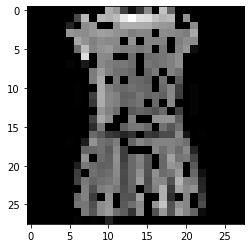

In [ ]:
plt.imshow(xTrain[3].reshape((28, 28)), cmap='gray')
print(f"xTrain => {xTrain.shape} \n xTest => {xTest.shape}")

In [ ]:
def denoiseAutoencoder(): 
    img_input = Input((28,28,1)) 
    x = Conv2D(28, (3, 3), strides=2, activation='relu', padding='same')(img_input)
    x = Conv2D(56, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = Flatten()(x) 
    z = Dense(56, activation='relu')(x) 
    x = Dense(5*5*56, activation='relu')(z) 
    x = Reshape((5,5,56))(x) 
    x = Conv2DTranspose(56, (3, 3), strides=2, padding='same')(x) 
    x = Conv2DTranspose(28, (3, 3), strides=2, padding='same')(x) 
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    x = Flatten()(x)
    x = Dense(28*28*1, activation='relu')(x)
    x = Reshape((28,28,1))(x)

    model = Model(img_input, x)
    model.compile(optimizer='adam', loss='mse') 

    return model

In [ ]:
modelDenoise = denoiseAutoencoder()

In [ ]:
history = modelDenoise.fit(xTrain, x_train, epochs=100, batch_size=100, validation_data = (xTest, x_test))

Epoch 1/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 2/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 3/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 4/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 5/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 6/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 7/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 8/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0116 - val_loss: 0.0125
Epoch 9/100
600/600 [==============================] - 6s 10ms/step - loss: 0.0116 - val_loss: 0.0124
Epoch 10/100
600/600 [==============================] - 6s 11ms/step - loss: 0.011

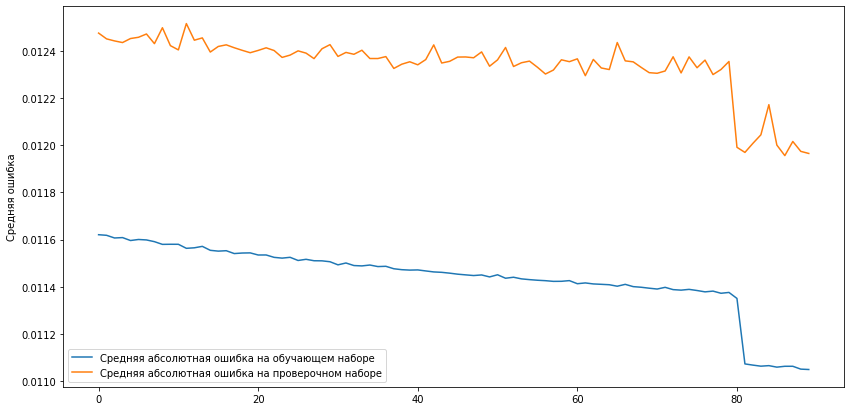

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
pred = modelDenoise.predict(xTest)
pred = pred * 255
pred = pred.astype('uint8')

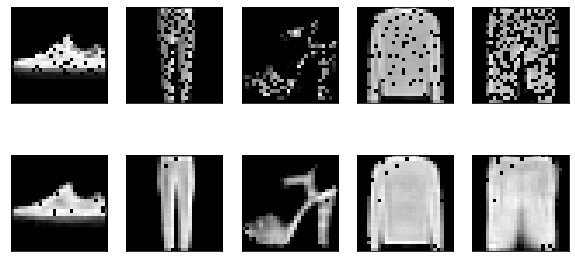

In [ ]:
plotImages(xTest, pred)